In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
import math as mt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
Iris = pd.read_table('../datafiles/iris/iris.data', sep=',')
Iris = Iris.dropna(how="all")

In [3]:
Iris.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


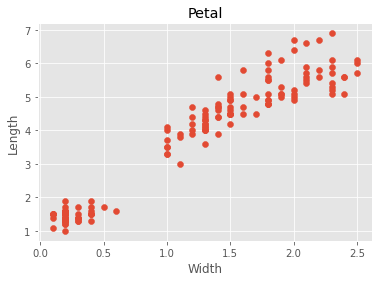

In [4]:
plt.style.use('ggplot')
plt.xlabel("Width")
plt.ylabel("Length")
plt.title("Petal")
xAxis = Iris['Petal width']
yAxis = Iris['Petal length']
plt.scatter(xAxis, yAxis)

HOW TO DO KMEANS
1. Pick a number of centroids (k) and number of iterations (n)
2. Choose k (random/chosen) points and mark them as centroids (they may have coordinates as some points from the data)
3. Iterate n times:
    3.1. Calculate distance from every centroid to every point from the data
    3.2. Assign every point to their closest centroid respectively
    3.3. Calculate average coordinates for every centroid based on coordinates that "their" points have
4. Return a statistics (maybe a plot) of clustering for each group and their centroids.

In [5]:
cols = list(zip(Iris['Petal width'], Iris['Petal length']))
test_samp = rd.sample(range(0,len(cols)), 5)
fresh = []
for x in range (0,5):
    es = cols[test_samp[x]]
    fresh.append(es)
fresh

[(0.2, 1.5), (1.4, 4.6), (0.2, 1.0), (1.3, 4.1), (2.1, 6.6)]

In [6]:
def setStartingCentroids2d(cols, k, seltype="random"):
    fresh_centroids = []
    #random centroid list selection
    if seltype=="random":
        samp = rd.sample(range(0,len(cols)), k)
        for x in range (0,k):
            fresh_centroids.append((cols[samp[x]]))
    return fresh_centroids

def assignGroups(distances):
    groups = []
    for row in range(0,len(distances)):
        groups.append(distances[row].index(min(distances[row])))
    return groups

    
def setDistances2d(cols, centroids):
    distances = []

    for row in range (0,len(cols)):
        point_distances = []
        for x in range(0, len(centroids)):
            point_distances.append(mt.sqrt(mt.pow(cols[row][0]-centroids[x][0],2)+mt.pow(cols[row][1]-centroids[x][1],2)))
        distances.append(point_distances)
    groups = assignGroups(distances)
    return groups

def newCentroids2d(centroids, groups, cols): #centroids: 1xK, distances: MxK, groups: Mx1, cols: Mx2
    new_centroids = []
    for k in range (0, len(centroids)):
        wAvg = 0
        lAvg = 0
        count = 0
        for m in range(0, len(groups)):
            if groups[m] == k:
                wAvg += cols[m][0]
                lAvg += cols[m][1]
                count += 1
        if count != 0: new_centroids.append([wAvg/count, lAvg/count])
        else: print("removing useless centroid")
    return new_centroids

def plotResult(cols, centroids, groups):
    plt.title("Iris chart with centroids")
    plt.xlabel("Width")
    plt.ylabel("Length")
    plt.style.use('seaborn-pastel')
    cols = np.array(cols)
    centroids = np.array(centroids)
    for g in range(0,len(centroids)):
        groupToScatter = []
        for p in range(0,len(cols)):
            if groups[p] == g:
                groupToScatter.append(cols[p])
        groupToScatter = np.array(groupToScatter)
        plt.scatter(groupToScatter[:,0], groupToScatter[:,1])
    
    plt.scatter(centroids[:,0], centroids[:,1], c="green")
    plt.show()


#My own k-means function for only two variables
def kmeans2d(column1, column2, k, n, seltype="random"):
    cols = list(map(list, zip(column1, column2)))
    centroids = setStartingCentroids2d(cols, k, seltype) #centroid list selection
    groups = setDistances2d(cols, centroids) #iterate n times to move centroids
    print("Starting centroids\n", np.array(centroids))
    for iterations in range(1,n):
        #TODO Można rozszerzyć tę pętlę o sprawdzanie czy po i-tej iteracji nastąpiły zmiany w pozycji centroidów. 
        #TODO Jeśli nie, to wyjść z pętli po i-tej iteracji zamiast po n iteracjach
        centroids = newCentroids2d(centroids, groups, cols)
        print("Centroids after recalculation, iteration nr "+str(iterations)+":\n", np.array(centroids))
        groups = setDistances2d(cols, centroids)
    
    plotResult(cols, centroids, groups)


Starting centroids
 [[1.5 4.9]
 [0.2 1.4]
 [1.4 4.7]]
Centroids after recalculation, iteration nr 1:
 [[1.99444444 5.51481481]
 [0.244      1.464     ]
 [1.30217391 4.19130435]]
Centroids after recalculation, iteration nr 2:
 [[2.01346154 5.53846154]
 [0.244      1.464     ]
 [1.31041667 4.22083333]]
Centroids after recalculation, iteration nr 3:
 [[2.02653061 5.58367347]
 [0.244      1.464     ]
 [1.33921569 4.25490196]]
Centroids after recalculation, iteration nr 4:
 [[2.0375     5.59583333]
 [0.244      1.464     ]
 [1.34230769 4.26923077]]


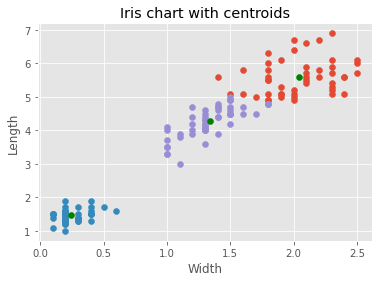

Starting centroids
 [[3.5 5.5]
 [3.  7.1]
 [3.3 5.1]]
Centroids after recalculation, iteration nr 1:
 [[3.19761905 5.78809524]
 [2.94074074 6.72777778]
 [3.05555556 5.00185185]]
Centroids after recalculation, iteration nr 2:
 [[3.064 5.804]
 [2.978 6.78 ]
 [3.12  4.946]]
Centroids after recalculation, iteration nr 3:
 [[2.93584906 5.82075472]
 [2.99791667 6.80416667]
 [3.23673469 4.92653061]]
Centroids after recalculation, iteration nr 4:
 [[2.79215686 5.88039216]
 [3.07111111 6.83777778]
 [3.28703704 4.97962963]]


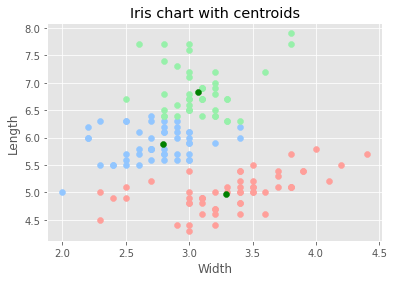

In [7]:
kmeans2d(Iris['Petal width'], Iris['Petal length'], 3, 5)
kmeans2d(Iris['Sepal width'], Iris['Sepal length'], 3, 5)

In [8]:
def setStartingCentroids(table, k, centroid_list=[]):
    if centroid_list == []:
        samp = rd.sample(range(0,len(table)), k)
        for x in range (0,k):
            centroid_list.append((table[samp[x]]))
    return centroid_list
    
def assignGroups(distances):
    groups = []
    for row in range(0,len(distances)):
        groups.append(distances[row].index(min(distances[row])))
    return groups
        
def setDistances(table, centroids):
    distances = []

    for row in range (0,len(table)):
        point_distances = []
        for x in range(0, len(centroids)):
            single_distance = 0
            for z in range(len(table[0])):
                single_distance +=mt.pow(table[row][z]-centroids[x][z],2)
            single_distance = mt.sqrt(single_distance)
            point_distances.append(single_distance)
        distances.append(point_distances)
    groups = assignGroups(distances)
    return groups

def newCentroids(table, centroids, groups):
    new_centroids = []
    for k in range (0, len(centroids)):
        count = 0
        centroid = []
        for x in range(0, len(table[0])):           #zrobienie w arrayu centroid tyle miejsc na wartości ile jest w tabeli
            centroid.append(0)
        for group in range(0, len(groups)):         #iteracja po groups[] i wybranie odpowiednich wartości z tabeli do wyliczenia nowego centroidu
            if (groups[group] == k):
                count += 1
                for z in range(0,len(centroid)):    
                    centroid[z] += table[k][z]
        if count != 0:                              #jeśli przynajmniej jeden punkt należy do centroidu to wyliczamy jego średnie koordynaty
            for av in range(0,len(centroid)):
                centroid[av] /= count
            new_centroids.append(centroid)
        else: print("removing useless centroid")    #w przeciwnym wypadku nawet go nie wyliczamy
    return new_centroids
    
    
def kMeans(table, k, n, centroid_list=[]):
    centroids = setStartingCentroids(table, k, centroid_list)
    groups = setDistances(table, centroids)
    print("Starting centroids\n", np.array(centroids))
    print(groups)
    for iterations in range(1,n):
        previous_centroids = centroids
        centroids = newCentroids(table, centroids, groups)
        if  (np.array(centroids) == np.array(previous_centroids)).all():
            print("After "+str(iterations)+" iterations program found an optimum. Leaving the loop...")
            break
        print("Centroids after recalculation, iteration nr "+str(iterations)+":\n", np.array(centroids))
        groups = setDistances(table, centroids)


In [9]:
kmeans_lib = KMeans(
    n_clusters=3,
    n_init=10,
    max_iter=100,
    random_state=42
)

In [10]:
sc = StandardScaler()
IrisData = Iris.drop("Species",axis=1)
IrisData_scaled = sc.fit_transform(IrisData)


In [11]:
kMeans(IrisData_scaled, 3, 5)

Starting centroids
 [[-1.02184904  0.33784833 -1.45500381 -1.31297673]
 [ 1.03800476  0.56925129  1.10395287  1.1850097 ]
 [-0.05250608 -0.8191665   0.08037019  0.00175297]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2]
Centroids after recalculation, iteration nr 1:
 [[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]]
Centroids after recalculation, iteration nr 2:
 [[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.337848

In [12]:
kmeans_lib.fit(IrisData_scaled)

KMeans(max_iter=100, n_clusters=3, random_state=42)

In [13]:
kmeans_lib.inertia_

140.96581663074699

In [14]:
kmeans_lib.cluster_centers_

array([[ 1.13597027,  0.09659843,  0.996271  ,  1.01717187],
       [-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [-0.05021989, -0.88029181,  0.34753171,  0.28206327]])

In [15]:
kmeans_lib.n_iter_

5

In [16]:
kmeans_lib.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])